#Data preprocessing

Import the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


Import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
data = pd.read_csv('IMDB Dataset.csv')
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Sentiment count

In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Removing html tags

In [ ]:
from bs4 import BeautifulSoup
import re
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_html_tag(text):
    return re.sub('\[[^]]*\]', '', text)
data['review'] = data['review'].apply(remove_html_tag)
data['review'] = data['review'].apply(strip_html)
data.head(10)

<ipython-input-5-d498cae4b76f>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Removing special character

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review'] = data['review'].apply(remove_special_characters)
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Text lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
word_mapping = {
    'is': 'be',
    'has': 'have',
    'does': 'do',
    'goes': 'go',
    'was': 'be'
}
#Stemming the text
def lemmatize_text(text):
    wnl = nltk.stem.WordNetLemmatizer()
    text= ' '.join([word_mapping[word] if word in word_mapping else wnl.lemmatize(word, pos = 'n') for word in text.split()])
    return text
#Apply function on review column
data['review'] = data['review'].apply(lemmatize_text)
data.head(10)

,review,sentiment
0,One of the other reviewer have mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this be a wonderful way to spend tim...,positive
3,Basically there a family where a little boy Ja...,negative
4,Petter Matteis Love in the Time of Money be a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show be an amazing fresh innovative idea ...,negative
8,Encouraged by the positive comment about this ...,negative
9,If you like original gut wrenching laughter yo...,positive


Removing stopwords

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokenizer=ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data['review'] = data['review'].apply(remove_stopwords)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,One reviewer mentioned watching 1 Oz episode y...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
5,Probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated Seahunt...,positive
7,show amazing fresh innovative idea 70 first ai...,negative
8,Encouraged positive comment film looking forwa...,negative
9,like original gut wrenching laughter like movi...,positive


Word cloud for postive and negative reviews

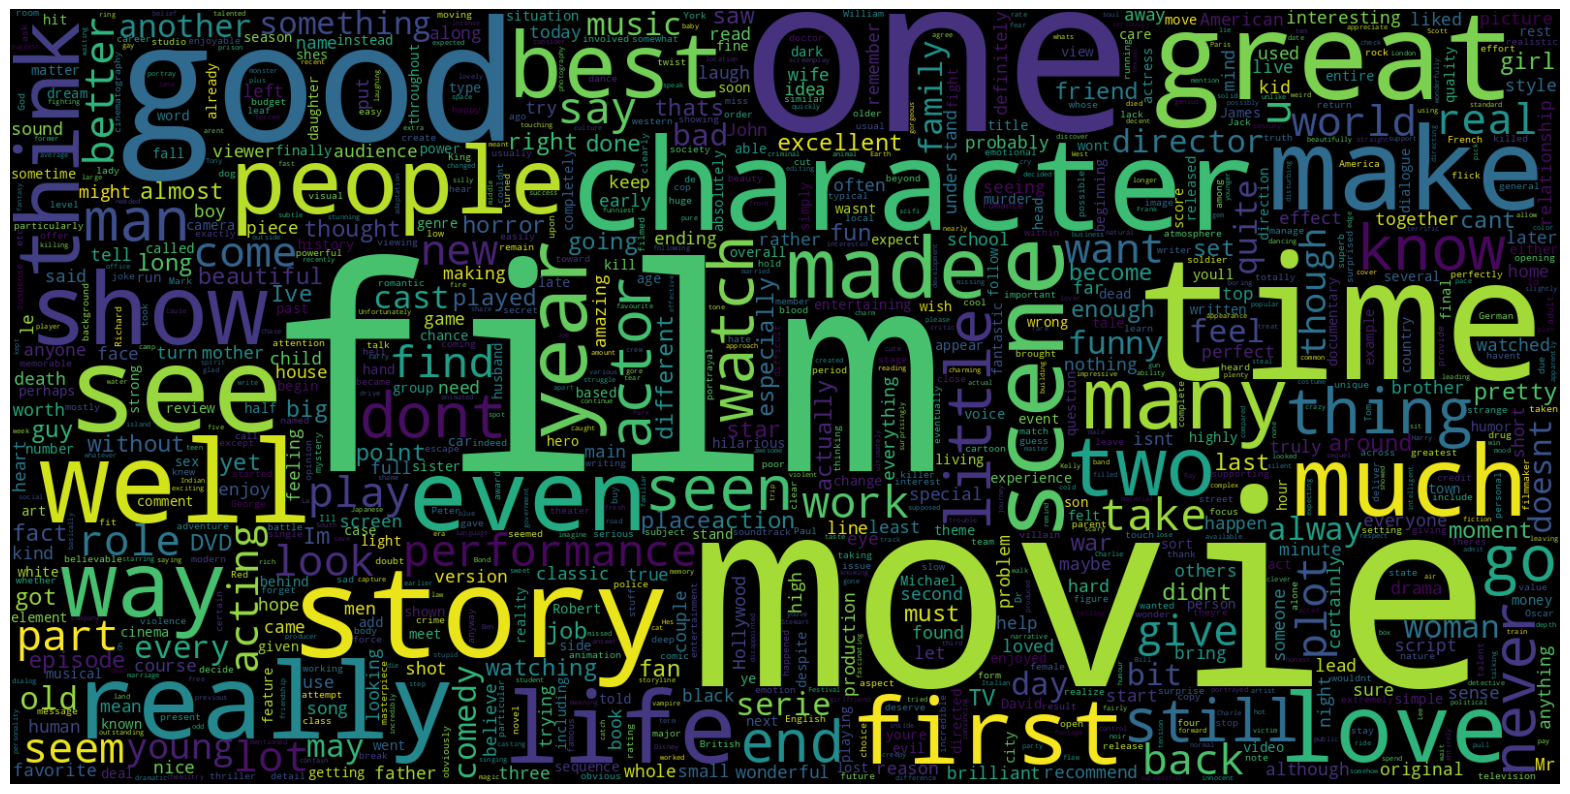

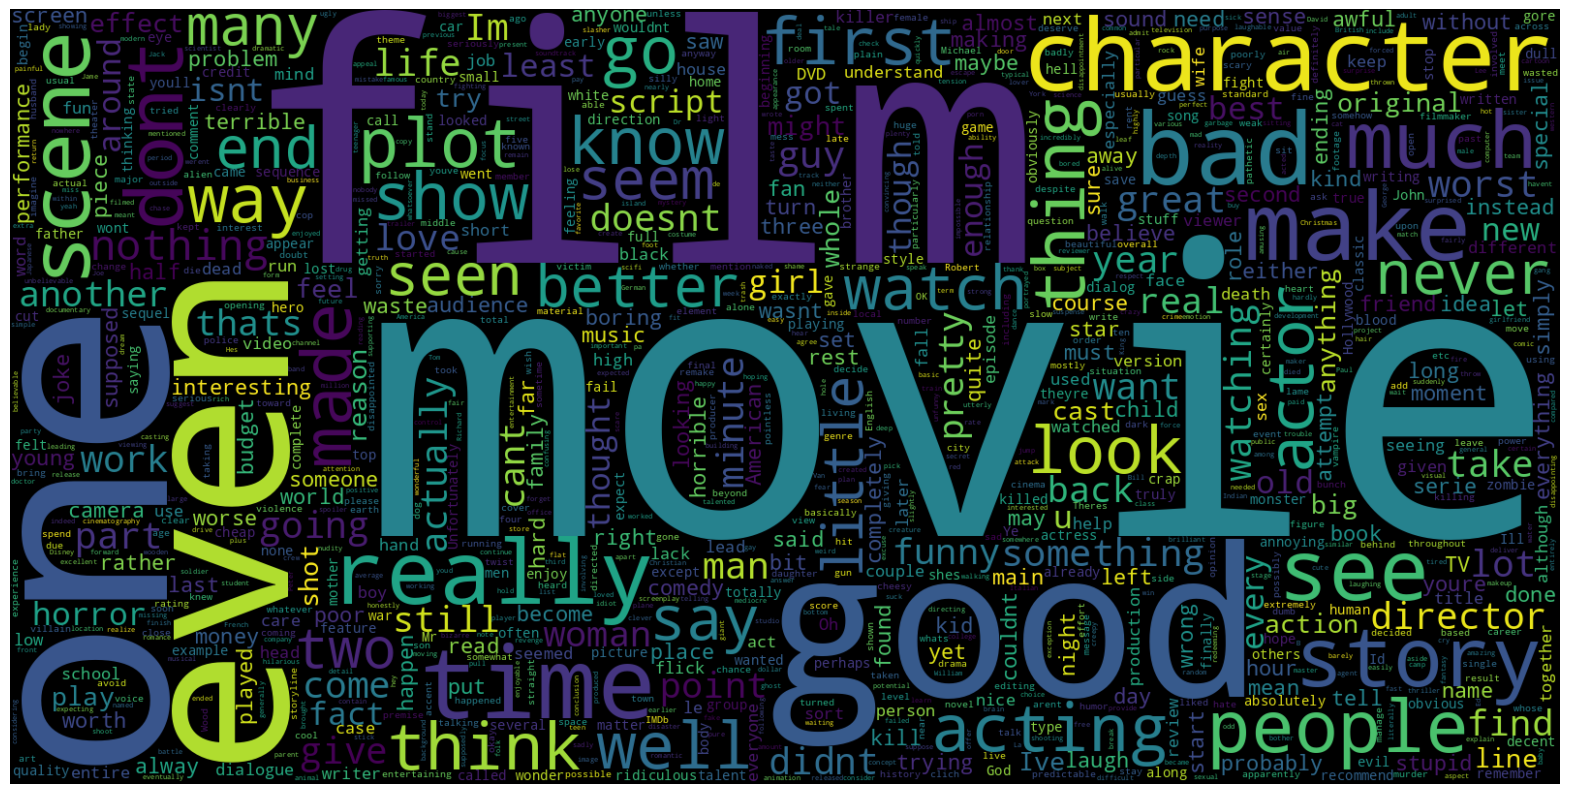

In [ ]:
from wordcloud import WordCloud
negative_data = data.loc[data['sentiment'] == 'negative']
positive_data = data.loc[data['sentiment'] == 'positive']
positive_text = ''.join(positive_data['review'])
negative_text = ''.join(negative_data['review'])
# Create and generate a word cloud image:
pos_wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(positive_text)
neg_wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(negative_text)
# Display the generated image:
plt.figure(figsize = (20,20))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.figure(figsize = (20,20))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Saving the preprocessed data

In [14]:
data.to_csv('After Preprocessed.csv')
files.download('After Preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>